# Import Necessary Libraries

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

# Loading The Data

In [2]:
df = pd.read_csv('train.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


# Understanding Data

In [3]:
df.shape

(550068, 12)

In [4]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [6]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

# Data Visualization

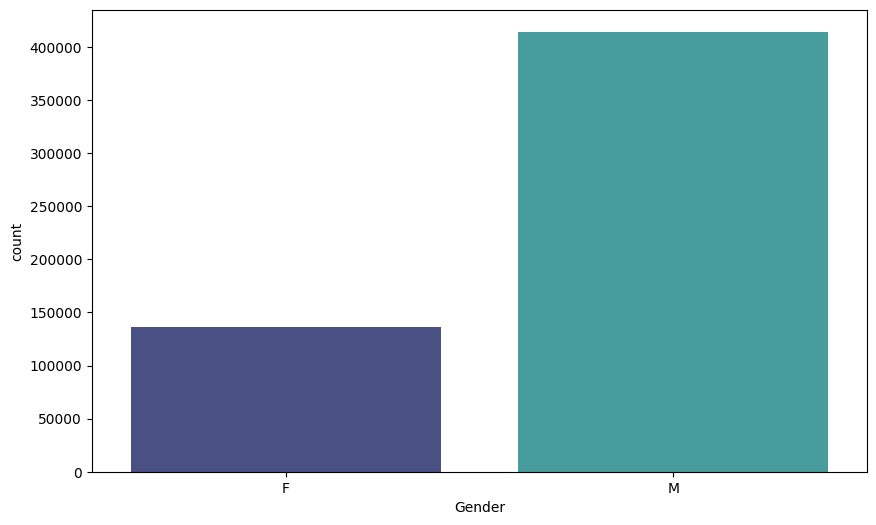

In [7]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='Gender',palette='mako')
plt.show()

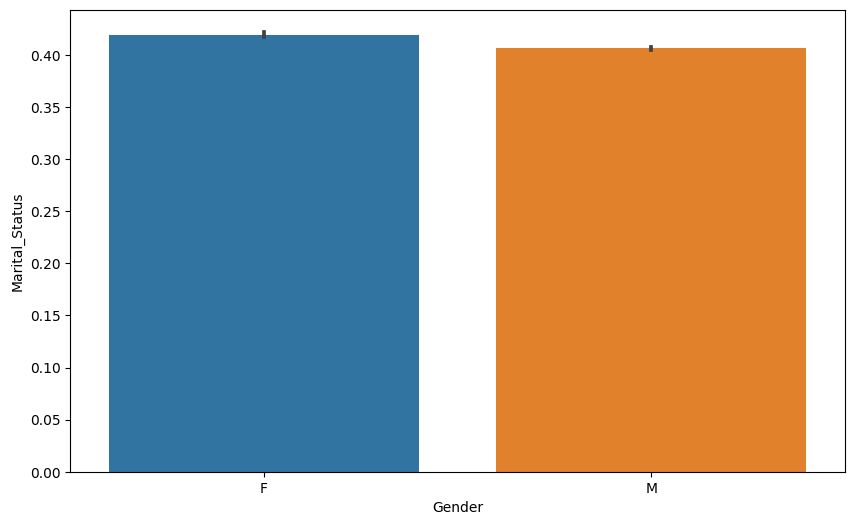

In [8]:
plt.figure(figsize=(10,6))
sns.barplot(x='Gender',y='Marital_Status',data=df)
plt.show()

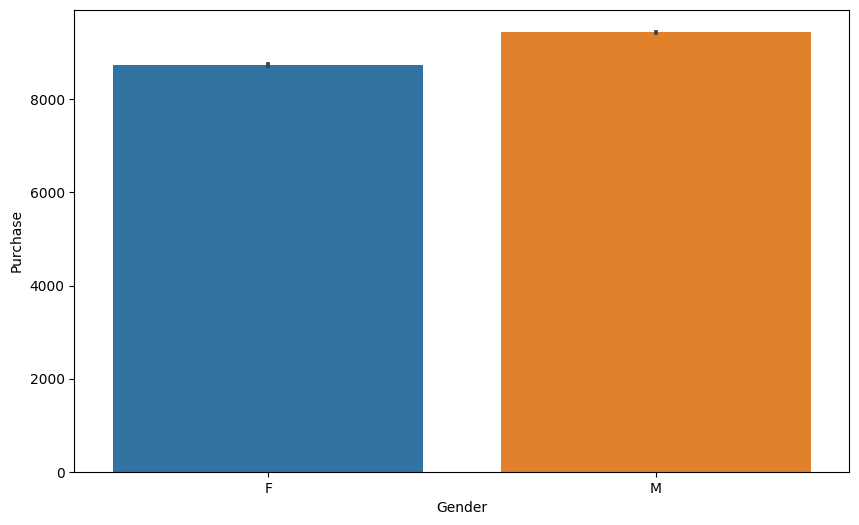

In [9]:
plt.figure(figsize=(10,6))
sns.barplot(x='Gender',y='Purchase',data=df)
plt.show()

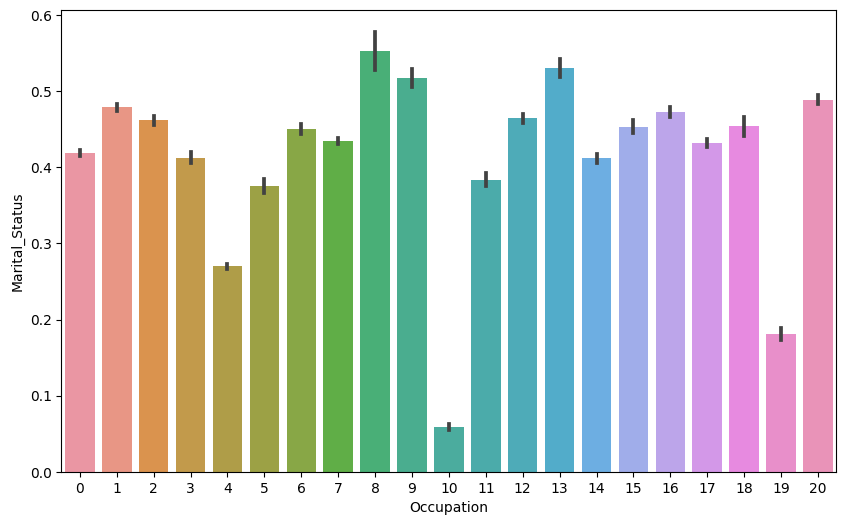

In [10]:
plt.figure(figsize=(10,6))
sns.barplot(x='Occupation',y='Marital_Status',data=df)
plt.show()

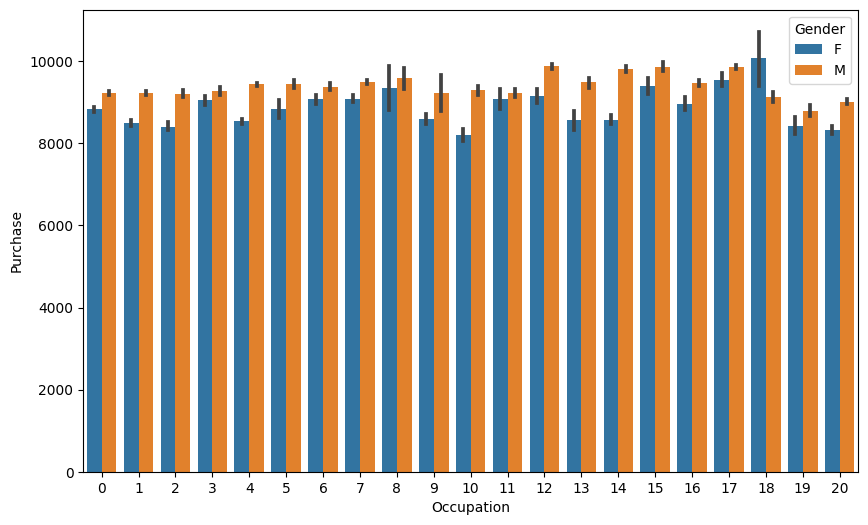

In [11]:
plt.figure(figsize=(10,6))
sns.barplot(hue='Gender',x='Occupation',y='Purchase',data=df)
plt.show()

# Outlier Detection

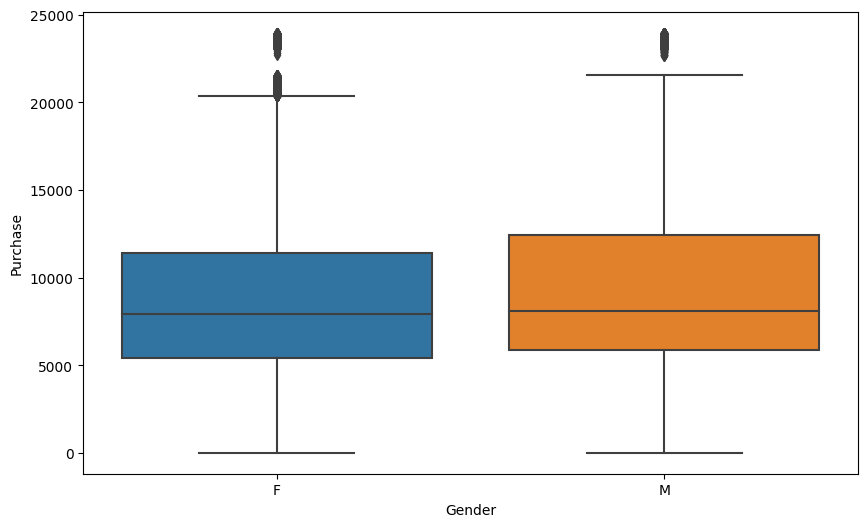

In [12]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df,x='Gender',y='Purchase')
plt.show()

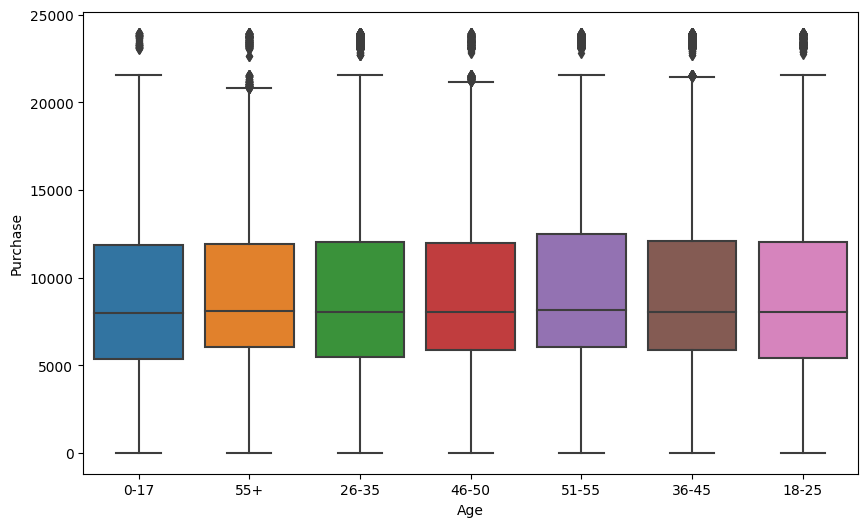

In [13]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df,x='Age',y='Purchase')
plt.show()

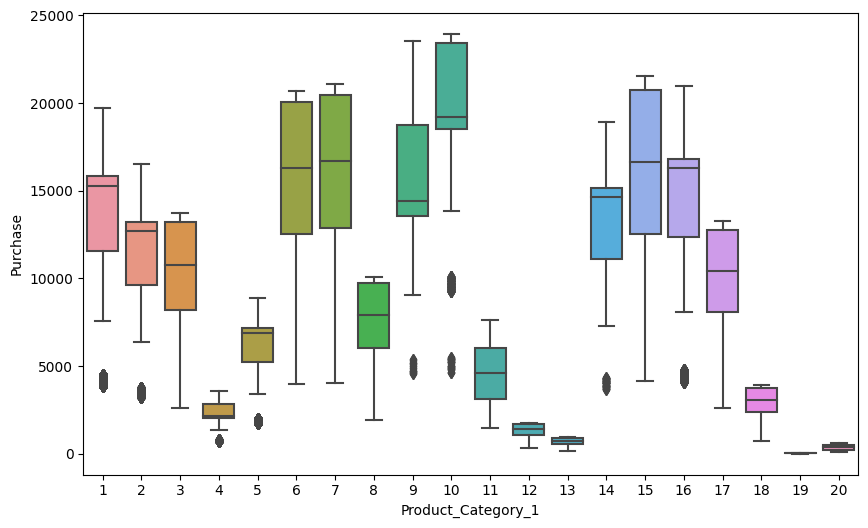

In [14]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df,x='Product_Category_1',y='Purchase')
plt.show()

# Data Preprocessing

In [15]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [16]:
df['Product_ID'] = df['Product_ID'].str.replace('P00','')
SS = StandardScaler()
df['Product_ID'] = SS.fit_transform(df['Product_ID'].values.reshape(-1,1))


In [17]:
df.drop(['Product_Category_3'],axis=1,inplace=True)

In [18]:
df['Product_Category_2'] = df['Product_Category_2'].fillna(df['Product_Category_2'].mean())

In [19]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Purchase                      0
dtype: int64

In [20]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1000001,-1.028774,F,0-17,10,A,2,0,3,9.842329,8370
1,1000001,0.722139,F,0-17,10,A,2,0,1,6.000000,15200
2,1000001,-0.845799,F,0-17,10,A,2,0,12,9.842329,1422
3,1000001,-0.869157,F,0-17,10,A,2,0,12,14.000000,1057
4,1000002,1.077382,M,55+,16,C,4+,0,8,9.842329,7969
...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,1.924156,M,51-55,13,B,1,1,20,9.842329,368
550064,1006035,1.953267,F,26-35,1,C,3,0,20,9.842329,371
550065,1006036,1.953267,F,26-35,15,B,4+,1,20,9.842329,137
550066,1006038,1.953267,F,55+,1,C,2,0,20,9.842329,365


# Label Encoding

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  float64
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          550068 non-null  float64
 10  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 46.2+ MB


In [22]:
cat_cols = ['Gender','Age','City_Category']

LE = LabelEncoder()
for i in cat_cols:
  df[i] = LE.fit_transform(df[i])
df.dtypes

User_ID                         int64
Product_ID                    float64
Gender                          int64
Age                             int64
Occupation                      int64
City_Category                   int64
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Purchase                        int64
dtype: object

In [23]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1000001,-1.028774,0,0,10,0,2,0,3,9.842329,8370
1,1000001,0.722139,0,0,10,0,2,0,1,6.000000,15200
2,1000001,-0.845799,0,0,10,0,2,0,12,9.842329,1422
3,1000001,-0.869157,0,0,10,0,2,0,12,14.000000,1057
4,1000002,1.077382,1,6,16,2,4+,0,8,9.842329,7969
...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,1.924156,1,5,13,1,1,1,20,9.842329,368
550064,1006035,1.953267,0,2,1,2,3,0,20,9.842329,371
550065,1006036,1.953267,0,2,15,1,4+,1,20,9.842329,137
550066,1006038,1.953267,0,6,1,2,2,0,20,9.842329,365


In [24]:
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].replace('4+','4')

In [25]:
df['gender'] = df['Gender'].astype(int)
df['Age'] = df['Age'].astype(int)
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype(int)



In [26]:
df['City_Category'] = df['City_Category'].astype('category')

In [27]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,gender
0,1000001,-1.028774,0,0,10,0,2,0,3,9.842329,8370,0
1,1000001,0.722139,0,0,10,0,2,0,1,6.000000,15200,0
2,1000001,-0.845799,0,0,10,0,2,0,12,9.842329,1422,0
3,1000001,-0.869157,0,0,10,0,2,0,12,14.000000,1057,0
4,1000002,1.077382,1,6,16,2,4,0,8,9.842329,7969,1
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,1.924156,1,5,13,1,1,1,20,9.842329,368,1
550064,1006035,1.953267,0,2,1,2,3,0,20,9.842329,371,0
550065,1006036,1.953267,0,2,15,1,4,1,20,9.842329,137,0
550066,1006038,1.953267,0,6,1,2,2,0,20,9.842329,365,0


# Distribution Plot 

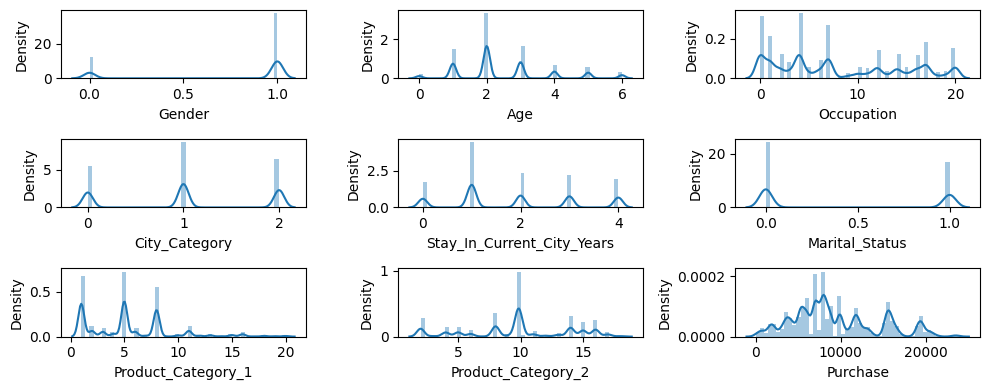

In [28]:
import warnings
warnings.filterwarnings('ignore')
rows = 3
cols = 3
fig,ax = plt.subplots(nrows=rows,ncols=cols,figsize=(10,4))
col = df.columns 
index = 2
for i in range(rows):
  for j in range(cols):
    sns.distplot(df[col[index]],ax=ax[i][j])
    index = index+1
plt.tight_layout()

# Log Transformation

In [29]:
df['Purchase'] = np.log(df['Purchase'])

In [30]:
df = pd.get_dummies(df)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,gender,City_Category_0,City_Category_1,City_Category_2
0,1000001,-1.028774,0,0,10,2,0,3,9.842329,9.032409,0,1,0,0
1,1000001,0.722139,0,0,10,2,0,1,6.000000,9.629051,0,1,0,0
2,1000001,-0.845799,0,0,10,2,0,12,9.842329,7.259820,0,1,0,0
3,1000001,-0.869157,0,0,10,2,0,12,14.000000,6.963190,0,1,0,0
4,1000002,1.077382,1,6,16,4,0,8,9.842329,8.983314,1,0,0,1


# Train Test Split

In [31]:
X = df.drop(labels=['Purchase'],axis=1)
Y = df['Purchase']

X.head()

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,gender,City_Category_0,City_Category_1,City_Category_2
0,1000001,-1.028774,0,0,10,2,0,3,9.842329,0,1,0,0
1,1000001,0.722139,0,0,10,2,0,1,6.000000,0,1,0,0
2,1000001,-0.845799,0,0,10,2,0,12,9.842329,0,1,0,0
3,1000001,-0.869157,0,0,10,2,0,12,14.000000,0,1,0,0
4,1000002,1.077382,1,6,16,4,0,8,9.842329,1,0,0,1


In [32]:
Y.head()

0    9.032409
1    9.629051
2    7.259820
3    6.963190
4    8.983314
Name: Purchase, dtype: float64

In [33]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.20,random_state=0)

In [34]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((440054, 13), (110014, 13), (440054,), (110014,))

In [35]:
scaled = StandardScaler()
X_train = scaled.fit_transform(X_train)
X_test = scaled.transform(X_test)


# Machine Learning 

# Linear regresion

In [36]:
from math import sqrt
model = LinearRegression()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

score = r2_score(y_test,y_pred)
MAE = mean_absolute_error(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(mean_squared_error(y_test,y_pred))
print('r2_score: ',score)
print('MAE: ',MAE)
print('MSE: ',MSE)
print('RMSE: ',RMSE)


r2_score:  0.20164268141541508
MAE:  0.45568380775419154
MSE:  0.4437961539534951
RMSE:  0.6661802713631612


# Decision Tree Regressor 

In [37]:
from math import sqrt
DT = DecisionTreeRegressor(max_depth=9)
DT.fit(X_train,y_train)

y_pred = DT.predict(X_test)

score = r2_score(y_test,y_pred)
MAE = mean_absolute_error(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(mean_squared_error(y_test,y_pred))
print('r2_score: ',score)
print('MAE: ',MAE)
print('MSE: ',MSE)
print('RMSE: ',RMSE)


r2_score:  0.7551574100338964
MAE:  0.2742807615349139
MSE:  0.1361047205574743
RMSE:  0.36892373271107715


# Random Forest regressor

In [38]:
from math import sqrt
RF = RandomForestRegressor( )
RF.fit(X_train,y_train)

y_pred = RF.predict(X_test)

score = r2_score(y_test,y_pred)
MAE = mean_absolute_error(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(mean_squared_error(y_test,y_pred))
print('r2_score: ',score)
print('MAE: ',MAE)
print('MSE: ',MSE)
print('RMSE: ',RMSE)


r2_score:  0.779936113688426
MAE:  0.25962998972907514
MSE:  0.12233057065511002
RMSE:  0.34975787432895633


In [39]:
df_test = pd.read_csv('test.csv')
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [40]:
df_test.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2             72344
Product_Category_3            162562
dtype: int64

In [41]:
df_test['Product_ID'] = df_test['Product_ID'].str.replace('P00','')
SS = StandardScaler()
df_test['Product_ID'] = SS.fit_transform(df_test['Product_ID'].values.reshape(-1,1))

In [42]:
df_test.drop(['Product_Category_3'],axis=1,inplace=True)

In [43]:
df_test['Product_Category_2'] = df_test['Product_Category_2'].fillna(df['Product_Category_2'].mean())

In [44]:
df_test.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
dtype: int64

In [45]:
df_test

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2
0,1000004,-0.434752,M,46-50,7,B,2,1,1,11.000000
1,1000009,-0.587188,M,26-35,17,C,0,0,3,5.000000
2,1000010,1.133865,F,36-45,1,B,4+,1,5,14.000000
3,1000010,-0.273465,F,36-45,1,B,4+,1,4,9.000000
4,1000011,-1.173330,F,26-35,1,C,1,0,4,5.000000
...,...,...,...,...,...,...,...,...,...,...
233594,1006036,-0.533098,F,26-35,15,B,4+,1,8,9.842329
233595,1006036,0.801456,F,26-35,15,B,4+,1,5,8.000000
233596,1006036,-1.389691,F,26-35,15,B,4+,1,1,5.000000
233597,1006037,-0.476058,F,46-50,1,C,4+,0,10,16.000000


# Label Encoding

In [46]:
cat_cols = ['Gender','Age','City_Category']

LE = LabelEncoder()
for i in cat_cols:
  df_test[i] = LE.fit_transform(df_test[i])
df_test.dtypes

User_ID                         int64
Product_ID                    float64
Gender                          int64
Age                             int64
Occupation                      int64
City_Category                   int64
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
dtype: object

In [47]:
df_test['Stay_In_Current_City_Years'] = df_test['Stay_In_Current_City_Years'].replace('4+','4')

In [48]:
df_test['gender'] = df_test['Gender'].astype(int)
df_test['Age'] = df_test['Age'].astype(int)
df_test['Stay_In_Current_City_Years'] = df_test['Stay_In_Current_City_Years'].astype(int)



In [49]:
df_test['City_Category'] = df_test['City_Category'].astype('category')

In [50]:
df_test = pd.get_dummies(df_test)

In [51]:
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,gender,City_Category_0,City_Category_1,City_Category_2
0,1000004,-0.434752,1,4,7,2,1,1,11.0,1,0,1,0
1,1000009,-0.587188,1,2,17,0,0,3,5.0,1,0,0,1
2,1000010,1.133865,0,3,1,4,1,5,14.0,0,0,1,0
3,1000010,-0.273465,0,3,1,4,1,4,9.0,0,0,1,0
4,1000011,-1.173330,0,2,1,1,0,4,5.0,0,0,0,1


In [52]:
df.shape

(550068, 14)

In [53]:
df_test.shape

(233599, 13)

In [56]:
test_pred = RF.predict(df_test)
len(test_pred)

233599

In [57]:
id_frame = pd.read_csv('test.csv')

In [59]:
id_info = id_frame[['User_ID','Product_ID']]
id_info.head()

,User_ID,Product_ID
0,1000004,P00128942
1,1000009,P00113442
2,1000010,P00288442
3,1000010,P00145342
4,1000011,P00053842


In [62]:
predictions = pd.DataFrame(test_pred,columns=['Purchase'])
predictions['User_ID'] = id_info['User_ID']
predictions['Product_ID'] = id_info['Product_ID']
predictions.head()


,Purchase,User_ID,Product_ID
0,9.544472,1000004,P00128942
1,9.537814,1000009,P00113442
2,4.545155,1000010,P00288442
3,4.545155,1000010,P00145342
4,4.598302,1000011,P00053842


In [63]:
predictions.to_csv('BlackFridaySales.csv',index=False)